In [1]:
%matplotlib notebook

import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.animation import FuncAnimation

def rosenbrock(p, a=0, b=1):
    X = p[0]
    Y = p[1]
    return (a-X)**2 + b*(Y-X**2)**2

def rastrigen(p):
    X = p[0]
    Y = p[1]
    return 20 + (X**2 - 10*np.cos(2*np.pi *X)) + (Y**2 - 10*np.cos(2*np.pi *Y))

x_min = -5
y_min = -5
x_max = 5
y_max = 5

population_size = 10 

mutation_p = 0.1

selection_p = 0.4

evo_steps = 200

fit_func = rastrigen # Change fitness function here!!!

<IPython.core.display.Javascript object>


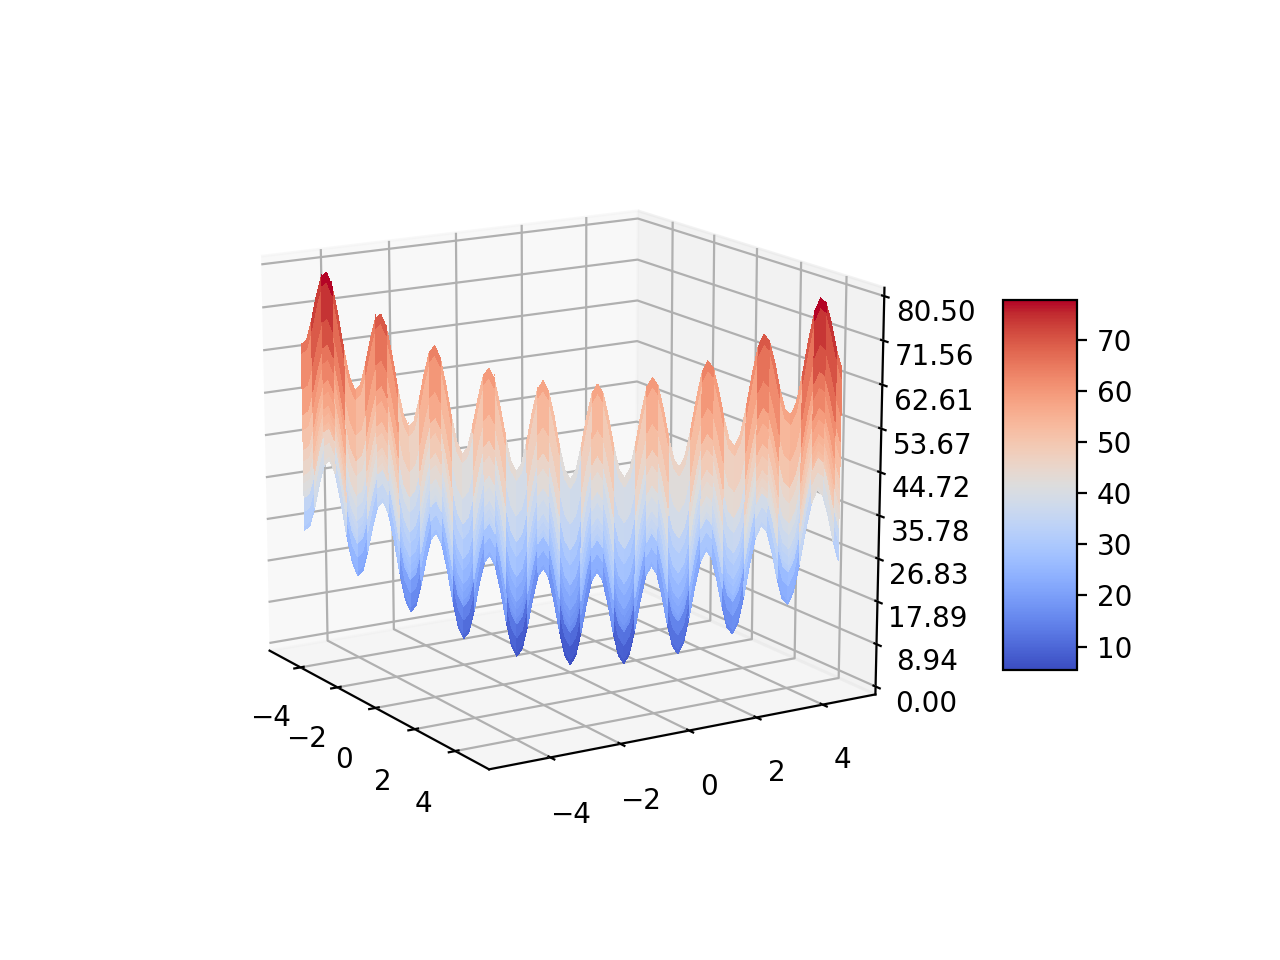

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
XY = np.meshgrid(X, Y)
Z = fit_func(XY)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [3]:
def cross_over(p1, p2):
    if np.random.rand() > .5:
        return [p1[0], p2[1]]
    else:
        return [p2[0], p1[1]]

def mutation(p):
    if np.random.rand() > 0.5:
        return [random.uniform(x_min, x_max), p[1]]
    else:
        return [p[0], random.uniform(y_min, y_max)]

In [4]:
def init_population(population_size):
    population = []
    for _ in range(population_size):
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)
        population.append([x,y])
    return population

In [5]:
def evolution(population, selection_p, mutation_p, fit_function):
    population_size = len(population)
    population.sort(key = fit_function)
    parents_c = int(selection_p * population_size)
    population = population[:parents_c]
    new_p = [] 
    for _ in range(population_size - parents_c):
        new_point = cross_over(random.choice(population), random.choice(population))
        if np.random.rand() < mutation_p:
            new_point = mutation(new_point)
        new_p.append(new_point)
    population.extend(new_p)
    return population

[[0.057595665262162754, 0.01021924773023919], [0.057595665262162754, 0.01021924773023919], [0.057595665262162754, 0.01021924773023919], [0.057595665262162754, 0.01021924773023919], [0.057595665262162754, 0.01021924773023919], [0.057595665262162754, 0.01021924773023919], [0.057595665262162754, 0.01021924773023919], [0.057595665262162754, 0.01021924773023919], [0.057595665262162754, 0.01021924773023919], [0.057595665262162754, 0.01021924773023919]]


<IPython.core.display.Javascript object>


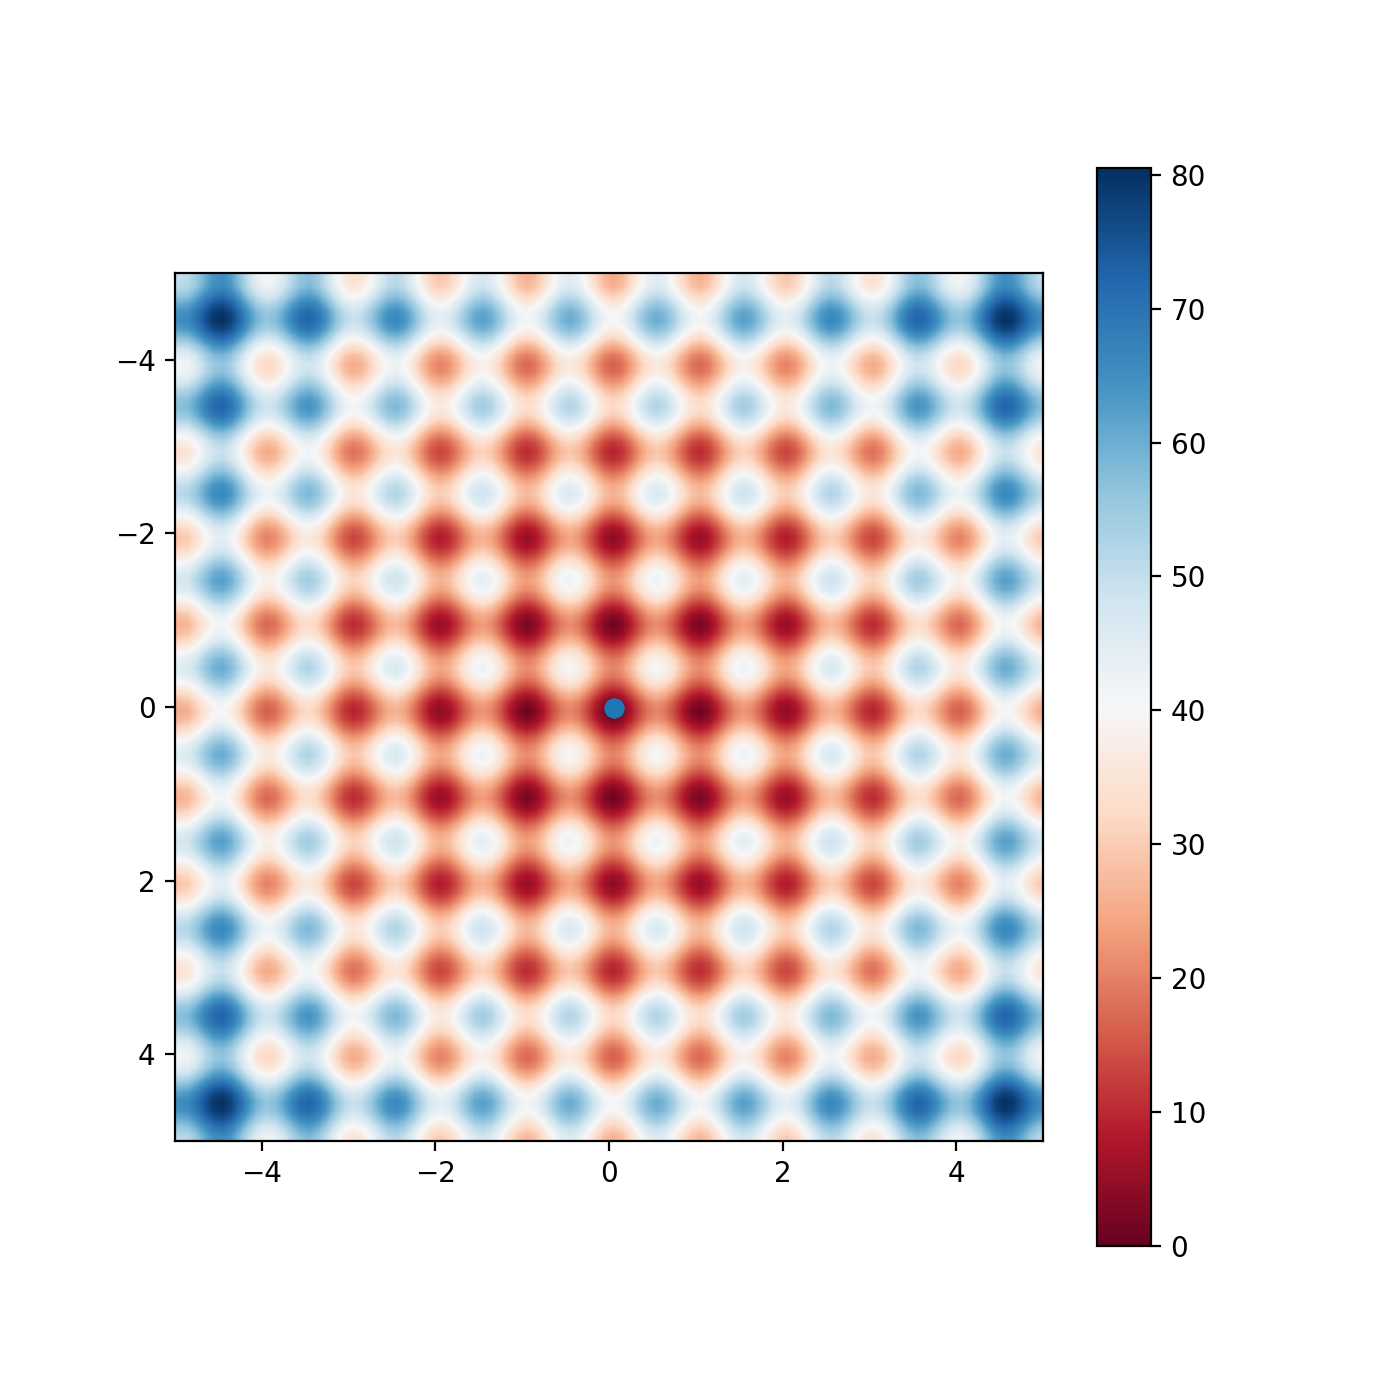

Found minimum: [0.057595665262162754, 0.01021924773023919]
Fitness: 0.671714922025


In [6]:
population = init_population(population_size)
populations = [population.copy()]
for _ in range(evo_steps):
    population = evolution(population, selection_p, mutation_p, fit_func)
    populations.append(population.copy())
print(population)

plot_population = np.array(populations[0]).T
fig = plt.figure(figsize=(7, 7))
im = plt.imshow(Z, cmap=plt.cm.RdBu, extent=(-5, 5, 5, -5), interpolation='bilinear')
plt.colorbar(im)
scat = plt.scatter(plot_population[0], plot_population[1])

def update(frame_number):
    plot_population = np.array(populations[frame_number])
    scat.set_offsets(plot_population)
    
animation = FuncAnimation(fig, update, interval=100, frames=evo_steps, repeat=False)
plt.show()

fitness = rastrigen(np.array(population).T)
i = np.argmin(fitness)
min_fit = fitness[i]
print("Found minimum:", population[i])
print("Fitness:", min_fit)